In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
files={}
files['MS3']=R.TFile("MS3/prodAnalysis_PMT.root")
files['MS2']=R.TFile("MS2/prodAnalysis_PMT.root")

In [59]:
g={}
g['lyDT_MS3']=files['MS3'].Get("lyOverDT_byProd_geo2_PREIRR")
g['lyAbs_MS3']=files['MS3'].Get("lyAbs_byProd_geo2_PREIRR")
g['lyNorm_MS3']=files['MS3'].Get("lyNorm_byProd_geo2_PREIRR")
g['tau_MS3']=files['MS3'].Get("dt_byProd_geo2_PREIRR")

In [61]:
g['lyDT_MS2']=R.TGraphErrors()
g['lyAbs_MS2']=R.TGraphErrors()
g['lyNorm_MS2']=R.TGraphErrors()
g['tau_MS2']=R.TGraphErrors()
for i,vendor in enumerate([1,2,3,4,5,6,8,9,10]):
    prod='prod%d'%vendor
    if vendor in [4,5,6,10]:
        prod='prod%d_ms2'%vendor
    g['lyAbs_MS2'].SetPoint(i,i,files['MS2'].Get("lyAbsAvgQECorr_%s"%prod).GetMean())
    g['lyAbs_MS2'].SetPointError(i,0,files['MS2'].Get("lyAbsAvgQECorr_%s"%prod).GetRMS())
    g['lyNorm_MS2'].SetPoint(i,i,files['MS2'].Get("lyNorm_%s"%prod).GetMean())
    g['lyNorm_MS2'].SetPointError(i,0,files['MS2'].Get("lyNorm_%s"%prod).GetRMS())
    g['tau_MS2'].SetPoint(i,i,files['MS2'].Get("dt_%s"%prod).GetMean())
    g['tau_MS2'].SetPointError(i,0,files['MS2'].Get("dt_%s"%prod).GetRMS())
    g['lyDT_MS2'].SetPoint(i,i,files['MS2'].Get("lyAbsOverDt_%s"%prod).GetMean())
    g['lyDT_MS2'].SetPointError(i,0,files['MS2'].Get("lyAbsOverDt_%s"%prod).GetRMS())

In [40]:
c1=R.TCanvas("c1","c1",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [47]:
l=R.TLegend(0.8,0.8,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

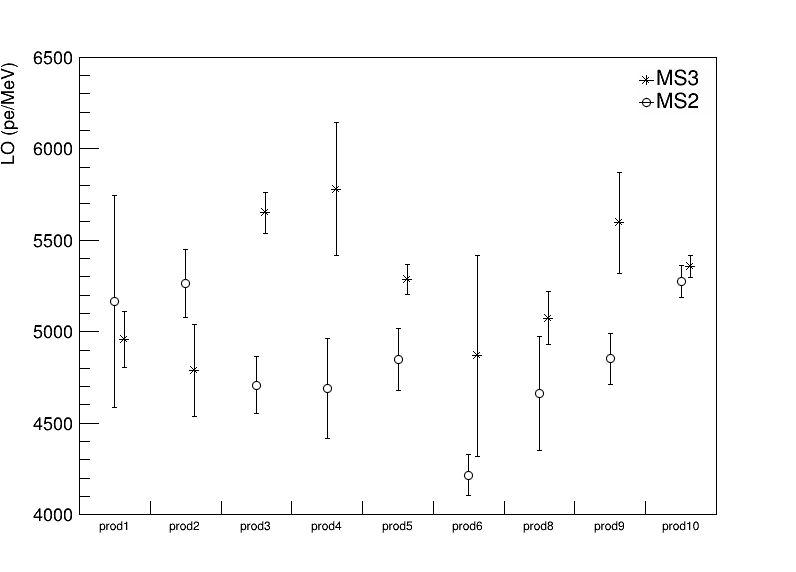

In [57]:
l.Clear()
g['lyAbs_MS3'].Draw("AP*")
l.AddEntry(g['lyAbs_MS3'],"MS3","PL")
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetLimits(4000,6500)
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetRangeUser(4000,6500)
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetTitle("LO (pe/MeV)")
g['lyAbs_MS2'].SetMarkerStyle(24)
g['lyAbs_MS2'].SetMarkerSize(1.2)
l.AddEntry(g['lyAbs_MS2'],"MS2","PL")
g['lyAbs_MS2'].Draw("PSAME")
l.Draw()
c1.Draw()

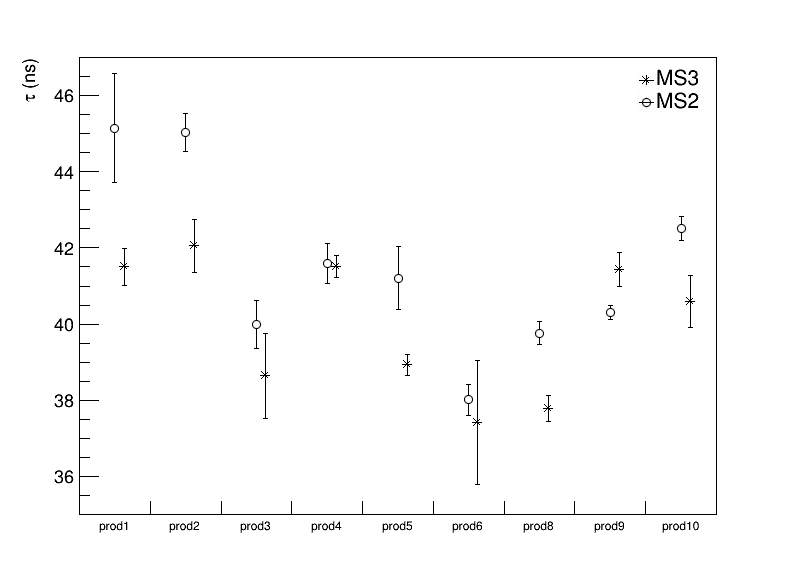

In [58]:
g['tau_MS3'].Draw("AP*")
g['tau_MS3'].GetHistogram().GetYaxis().SetLimits(35,47)
g['tau_MS3'].GetHistogram().GetYaxis().SetRangeUser(35,47)
g['tau_MS3'].GetHistogram().GetYaxis().SetTitle("#tau (ns)")
g['tau_MS2'].SetMarkerStyle(24)
g['tau_MS2'].SetMarkerSize(1.2)
g['tau_MS2'].Draw("PSAME")
l.Draw()
c1.Draw()

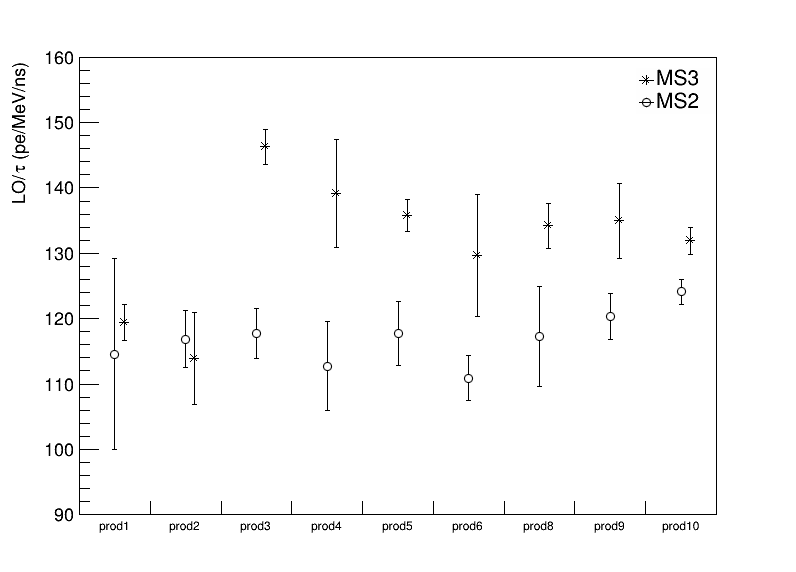

In [56]:
g['lyDT_MS3'].Draw("AP*")
g['lyDT_MS3'].GetHistogram().GetYaxis().SetLimits(90,160)
g['lyDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(90,160)
g['lyDT_MS3'].GetHistogram().GetYaxis().SetTitle("LO/#tau (pe/MeV/ns)")
g['lyDT_MS2'].SetMarkerStyle(24)
g['lyDT_MS2'].SetMarkerSize(1.2)
g['lyDT_MS2'].Draw("PSAME")
l.Draw()
c1.Draw()

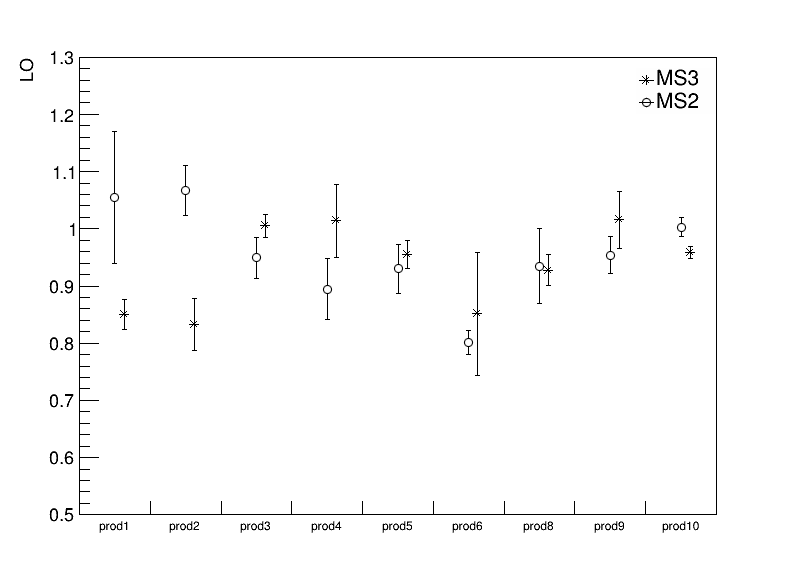

In [63]:
g['lyNorm_MS3'].Draw("AP*")
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetLimits(0.5,1.3)
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetRangeUser(0.5,1.3)
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetTitle("LO")
g['lyNorm_MS2'].SetMarkerStyle(24)
g['lyNorm_MS2'].SetMarkerSize(1.2)
g['lyNorm_MS2'].Draw("PSAME")
l.Draw()
c1.Draw()